# Prophet

## Use the daily Yahoo closing stock values

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [6]:
import pandas_datareader.data as web
start_date = datetime(2006, 1, 1)
end_date = datetime(2016, 1, 1)
#Bank of America
bac = web.DataReader('BAC', 'stooq', start_date, end_date)
bac.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,14.7814,14.8325,14.6233,14.6233,5.417059e+07
2015-12-30,14.9473,14.9807,14.8070,14.8168,4.030734e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07


In [8]:
bac_df = bac['Close'].to_frame().reset_index('Date')

In [10]:
bac_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [11]:
bac_df.head()

,Date,Close
0,2015-12-31,14.6233
1,2015-12-30,14.8168
2,2015-12-29,15.0131
3,2015-12-28,14.8846
4,2015-12-24,15.0063


In [12]:
from prophet import Prophet

forecaster = Prophet()
forecaster.fit(
    bac_df.rename(columns={"Date": "ds", "Close": "y"})
)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = forecaster.make_future_dataframe(periods=90)

In [16]:
future.head()

,ds
0,2006-01-03
1,2006-01-04
2,2006-01-05
3,2006-01-06
4,2006-01-09


In [21]:
forecast = forecaster.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2602,2016-03-26,16.317538,14.224642,18.335946
2603,2016-03-27,16.339470,14.263938,18.498460
2604,2016-03-28,15.368225,13.360750,17.431421
2605,2016-03-29,15.407168,13.211761,17.451419
2606,2016-03-30,15.418680,13.271729,17.462320


In [22]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2006-01-03,37.370217,35.514837,39.363753
1,2006-01-04,37.408127,35.449343,39.441031
2,2006-01-05,37.420171,35.560116,39.429221
3,2006-01-06,37.436654,35.516805,39.490612
4,2006-01-09,37.406876,35.430657,39.277332


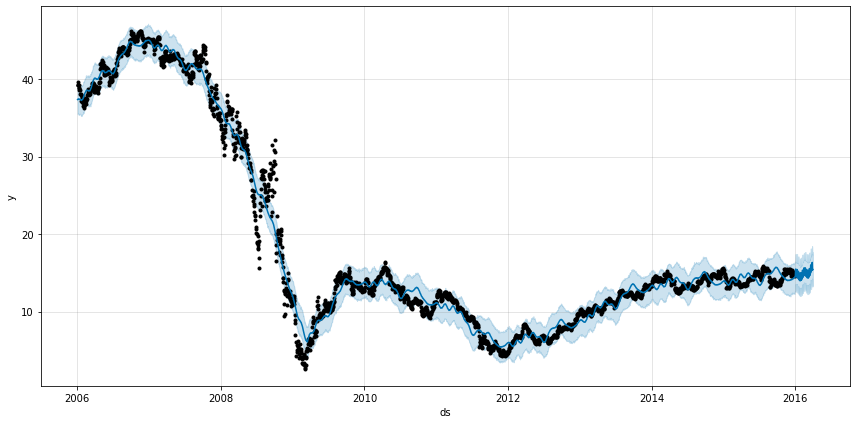

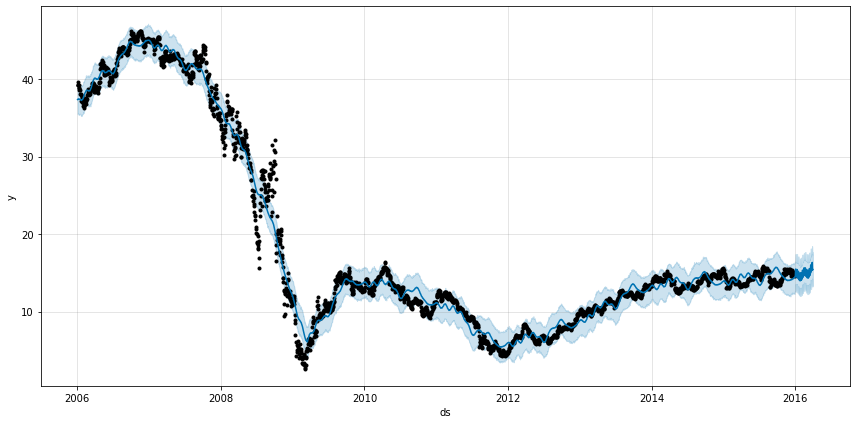

In [20]:
forecaster.plot(forecast, figsize=(12, 6))